In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [6]:
df = pd.read_csv('depression.csv')

In [8]:
df.shape

(6982, 2)

In [10]:
df.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [12]:
df.tail()

,text,label
6977,I can't forget you #SpiritHadrian,0.0
6978,€ ®šæœŸâ˜†ã€'..DJ DAIKI! DJ DAIKI! DJ DAIKI!.D...,0.0
6979,Dai5y! <3,0.0
6980,tired of clowns but still hopefully tonight if...,0.0
6981,MW SUBI WN LA VACA,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6982 entries, 0 to 6981
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    6982 non-null   object 
 1   label   6980 non-null   float64
dtypes: float64(1), object(1)
memory usage: 109.2+ KB


In [16]:
df.isnull().sum()

text     0
label    2
dtype: int64

In [18]:
df = df.dropna()

In [20]:
df.shape

(6980, 2)

shuffling the dataset 

In [23]:
df = df.sample(frac = 1)

<Axes: ylabel='count'>

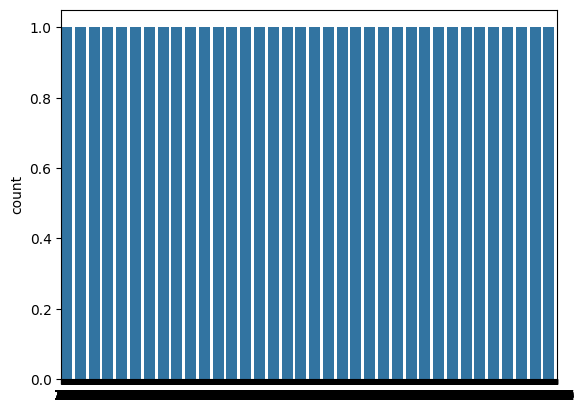

In [25]:
sns.countplot(df.label)

Preprocessing Text

In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import string
from bs4 import BeautifulSoup

In [28]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/taeefmemon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [58]:
import re
import string

def text_transformation(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r"\W", " ", text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)    
    return text


Contraction Mapping

In [61]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [85]:
from bs4 import BeautifulSoup
import re
import pandas as pd

# Assuming your contraction_mapping is already defined as you posted above

def text_cleaner(text):
    if not isinstance(text, str):
        return ""

    newString = text.lower()
    newString = BeautifulSoup(newString, "html.parser").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    
    # Expand contractions
    newString = ' '.join([contraction_mapping.get(word, word) for word in newString.split()])    
    
    # Remove possessive 's
    newString = re.sub(r"'s\b", "", newString)
    
    # Remove non-alphabetic characters
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    
    # Normalize repeated 'm'
    newString = re.sub('[m]{2,}', 'mm', newString)
    
    # Remove extra spaces
    newString = re.sub(r'\s+', ' ', newString).strip()

    return newString

# Apply the function to your DataFrame
df['cleaned'] = df['text'].apply(lambda x: text_cleaner(x) if pd.notnull(x) else "")


/var/folders/7y/v1vd7p416c399zmjr4mxljb40000gn/T/ipykernel_18455/1061712755.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  newString = BeautifulSoup(newString, "html.parser").text


In [87]:
conda install lxml


Channels:
 - defaults
Platform: osx-arm64
doneecting package metadata (repodata.json): - 
doneing environment: / 

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


Visualizing WordCloud

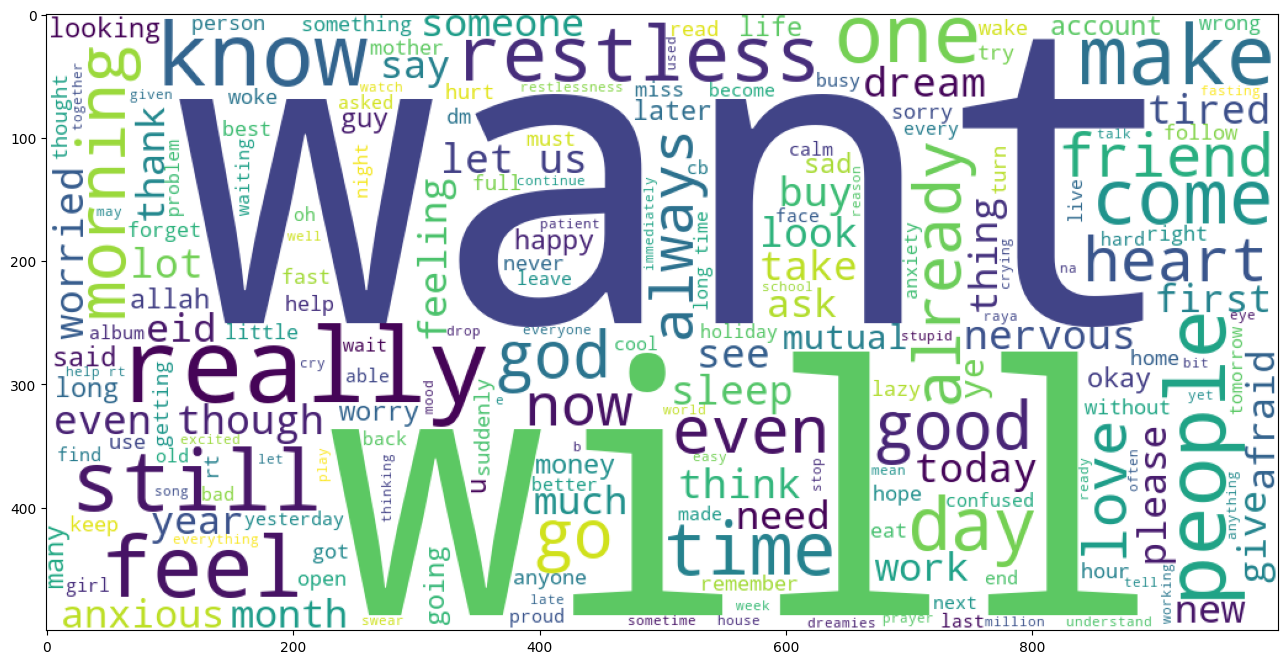

In [91]:
from wordcloud import WordCloud
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in df['cleaned']:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 6).generate(word_cloud)
plt.imshow(wordcloud)

In [93]:
df.tail()

,text,label,cleaned
3470,"Hey, you guys have general errors, don't you? :(",0.0,hey you guys have general errors do not you
1236,"If you want something you haven't had, then yo...",0.0,if you want something you have not had then yo...
1411,If you were given a choice when an idol comeba...,0.0,if you were given a choice when an idol comeba...
4904,Nothing can help calm the soul apart from ones...,0.0,nothing can help calm the soul apart from ones...
2493,"After paying off Dreamies, lgsg dp album seven...",0.0,after paying off dreamies lgsg dp album sevent...


Feature Extraction with CountVectorizer

In [96]:
X = df.cleaned
y = df.label

In [98]:
vect = CountVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2))

In [100]:
X_cv =vect.fit_transform(X).toarray()

In [102]:
X_cv.shape

(6980, 20000)

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X_cv,y,test_size = 0.2,random_state = 1,stratify = y)

Model Performance Evaluation

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,VotingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [109]:
def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_test,y_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

Logistic Regression

Accuracy : 0.9849570200573066

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1249
         1.0       0.98      0.87      0.92       147

    accuracy                           0.98      1396
   macro avg       0.98      0.93      0.96      1396
weighted avg       0.98      0.98      0.98      1396

   ------------ Confusion Matrix -------------- 


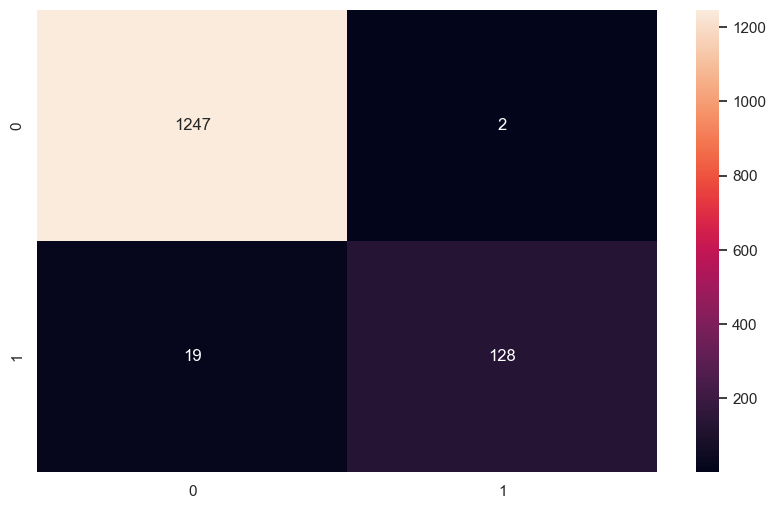

In [112]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
performance_eval(clf_lr,X_test)

Naive Bayes

Accuracy : 0.9305157593123209

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      1249
         1.0       0.63      0.82      0.71       147

    accuracy                           0.93      1396
   macro avg       0.80      0.88      0.84      1396
weighted avg       0.94      0.93      0.93      1396

   ------------ Confusion Matrix -------------- 


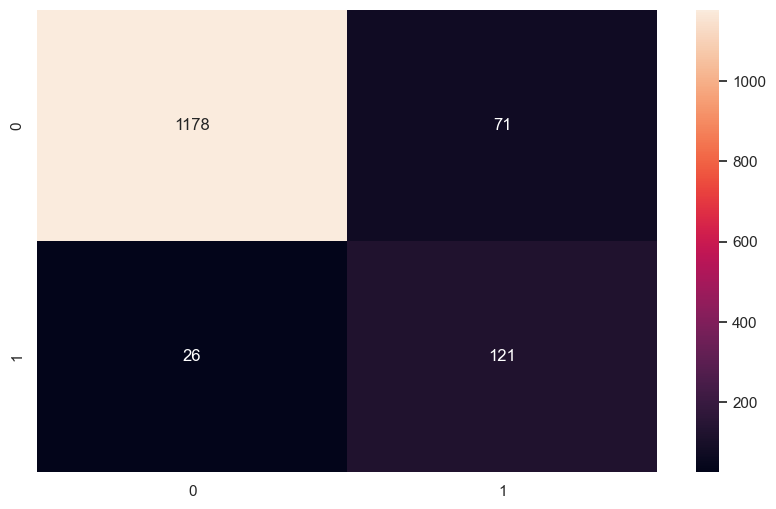

In [115]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
performance_eval(clf_nb,X_test)

Decision Tree

Accuracy : 0.9871060171919771

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1249
         1.0       0.95      0.93      0.94       147

    accuracy                           0.99      1396
   macro avg       0.97      0.96      0.97      1396
weighted avg       0.99      0.99      0.99      1396

   ------------ Confusion Matrix -------------- 


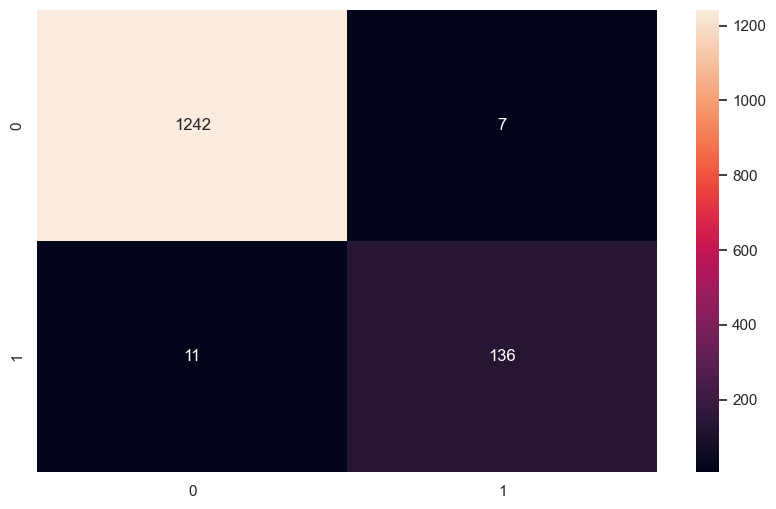

In [117]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
performance_eval(clf_dt,X_test)

SVM

Accuracy : 0.9527220630372493

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1249
         1.0       0.98      0.56      0.72       147

    accuracy                           0.95      1396
   macro avg       0.96      0.78      0.84      1396
weighted avg       0.95      0.95      0.95      1396

   ------------ Confusion Matrix -------------- 


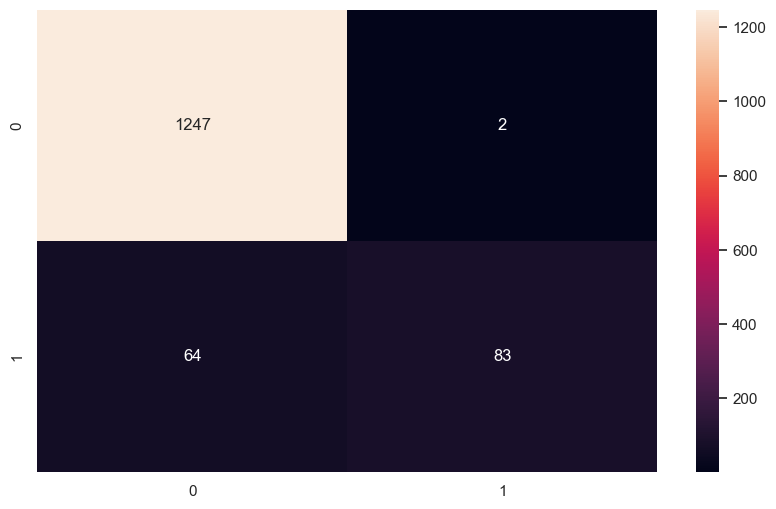

In [119]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
performance_eval(clf_svm,X_test)

KNeighborsClassifier

Accuracy : 0.919054441260745

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1249
         1.0       0.97      0.24      0.38       147

    accuracy                           0.92      1396
   macro avg       0.94      0.62      0.67      1396
weighted avg       0.92      0.92      0.90      1396

   ------------ Confusion Matrix -------------- 


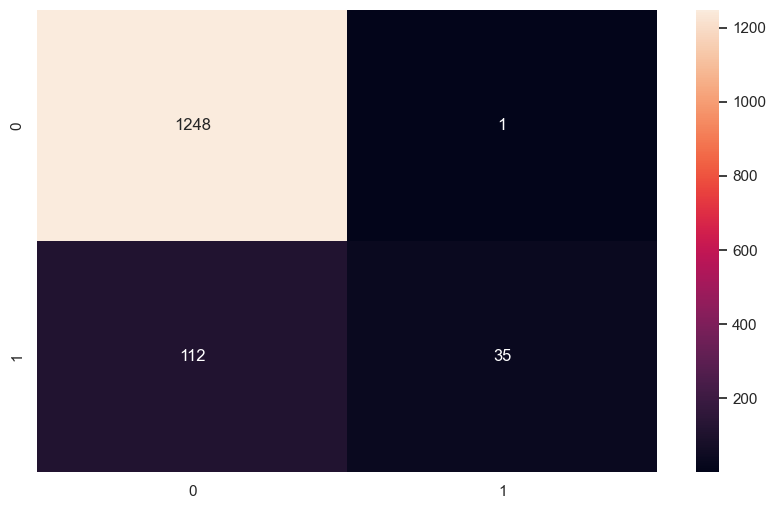

In [122]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
performance_eval(clf_knn,X_test)

Adaboost Classifier

Accuracy : 0.9441260744985673

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1249
         1.0       1.00      0.47      0.64       147

    accuracy                           0.94      1396
   macro avg       0.97      0.73      0.80      1396
weighted avg       0.95      0.94      0.93      1396

   ------------ Confusion Matrix -------------- 


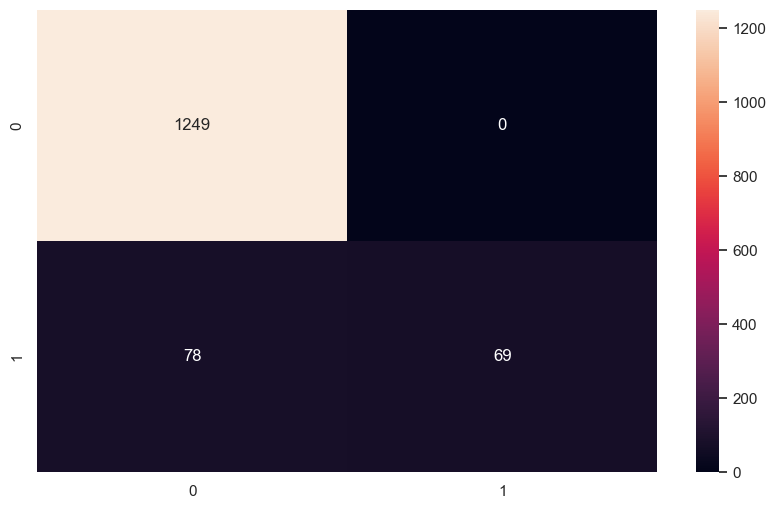

In [124]:
clf_adb = AdaBoostClassifier()
clf_adb.fit(X_train, y_train)
performance_eval(clf_adb,X_test)

Random Forest

Accuracy : 0.9813753581661891

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1249
         1.0       0.97      0.85      0.91       147

    accuracy                           0.98      1396
   macro avg       0.98      0.92      0.95      1396
weighted avg       0.98      0.98      0.98      1396

   ------------ Confusion Matrix -------------- 


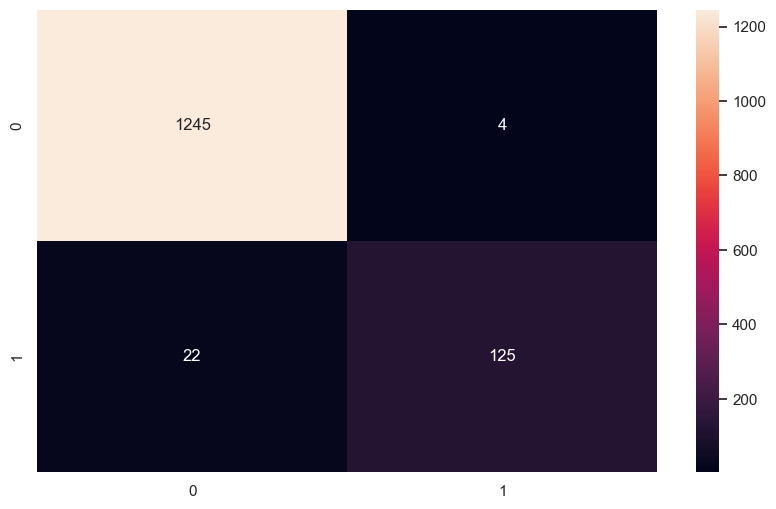

In [127]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
performance_eval(clf_rf,X_test)

Ensemble

Accuracy : 0.9749283667621776

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1249
         1.0       0.98      0.78      0.87       147

    accuracy                           0.97      1396
   macro avg       0.98      0.89      0.93      1396
weighted avg       0.98      0.97      0.97      1396

   ------------ Confusion Matrix -------------- 


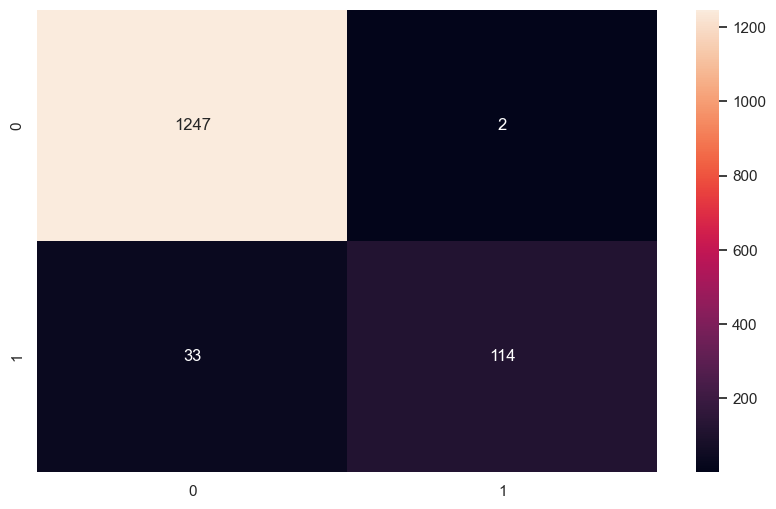

In [129]:
voting_clf = VotingClassifier(estimators=[('SVC', clf_svm),
                                          ('LogReg', clf_lr),
                                          ('RF', clf_rf),
                                          ('AdaBoost',clf_adb),
                                          ('KNN',clf_knn),
                                          ('NB',clf_nb),
                                          ('DT',clf_dt)
                                         ],
                              voting='hard'
                             )
voting_clf.fit(X_train, y_train)
performance_eval(voting_clf,X_test)

Saving the Best Model

In [253]:
import pickle
filename = 'CV_BestModel.sav'
pickle.dump(voting_clf, open(filename, 'wb'))

Checking for User Input

In [266]:
text = "I am / exhauted :) and restless."

In [268]:
clean_text = text_cleaner(text)

/var/folders/7y/v1vd7p416c399zmjr4mxljb40000gn/T/ipykernel_18455/1061712755.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  newString = BeautifulSoup(newString, "html.parser").text


In [270]:
clean_text

'i am exhauted and restless'

In [272]:
loaded_model = pickle.load(open('CV_BestModel.sav', 'rb'))
single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]

In [273]:

output = {
    0: "No Anxiety",
    1: "Anxiety"
}

custom_tips = {
    "sleep": "😴 Try to get 7-8 hours of quality sleep every night.",
    "caffeine": "☕ Cut down on caffeine intake — especially in the evening.",
    "stress": "🧘 Practice deep breathing, meditation, or yoga to manage stress.",
    "exercise": "🏃‍♂️ Even 30 minutes of physical activity can reduce anxiety.",
    "alcohol": "🚫 Avoid alcohol as it can worsen anxiety symptoms.",
    "diet": "🥗 A balanced diet helps improve mood.",
    "overthinking": "🧠 Try journaling or talking to a friend to ease your mind.",
    "lonely": "💬 Reach out to a friend or a support group.",
    "heart": "❤️ Rapid heartbeat? Try grounding exercises like 5-4-3-2-1 technique."
}
def generate_suggestions(user_input):
    suggestions = []
    input_text = user_input.lower()
    for keyword, tip in custom_tips.items():
        if keyword in input_text:
            suggestions.append(tip)
    return suggestions

# Print result
print("Prediction:", output[single_prediction])

# Give more info based on prediction
if single_prediction == 1:
    print("\n🚨 You may be experiencing symptoms of anxiety.")
    print("📞 Helpline: 1800-599-0019 (India Mental Health Helpline)")
    print("🌐 Online Support: https://www.mentalhealthindia.com/")
    
    # Personalized suggestions
    tips = generate_suggestions(clean_text)
    if tips:
        print("\n💡 Personalized Tips:")
        for tip in tips:
            print("-", tip)
    else:
        print("\n💡 Tip: Try to identify the root cause of your anxiety and talk to someone you trust.")
        
else:
    print("\n✅ You seem to be doing fine. Keep it up!")
    print("🌟 Tip: Maintain a balanced lifestyle with proper sleep, exercise, and nutrition.")

Prediction: Anxiety

🚨 You may be experiencing symptoms of anxiety.
📞 Helpline: 1800-599-0019 (India Mental Health Helpline)
🌐 Online Support: https://www.mentalhealthindia.com/

💡 Tip: Try to identify the root cause of your anxiety and talk to someone you trust.
